In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
GAE_data = pd.read_csv("GAE_Cora.csv")
sGAE_data = pd.read_csv("Trainer_Cora.csv")

In [ ]:
GAE_data.head()

,epoch,acc,nmi,ari,f1
0,0,0.372969,0.241268,0.183842,0.333159
1,1,0.451625,0.352266,0.271144,0.400007
2,2,0.574225,0.421307,0.351430,0.526015
3,3,0.600443,0.455643,0.401626,0.546552
4,4,0.577179,0.458108,0.383587,0.515863


In [ ]:
sGAE_data.head()

,epoch,train_acc,train_nmi,train_ari,train_f1,test_acc,test_nmi,test_ari,test_f1
0,0,0.293750,0.134180,0.077716,0.237918,0.250369,0.068322,0.025578,0.183724
1,1,0.589286,0.360711,0.321161,0.470917,0.333826,0.133835,0.061231,0.280987
2,2,0.000000,0.718349,0.665217,0.000000,0.000000,0.266407,0.147568,0.000000
3,3,0.886607,0.827290,0.804538,0.795096,0.528434,0.330101,0.209777,0.474781
4,4,0.899107,0.846517,0.829892,0.813759,0.559084,0.347609,0.246723,0.503039


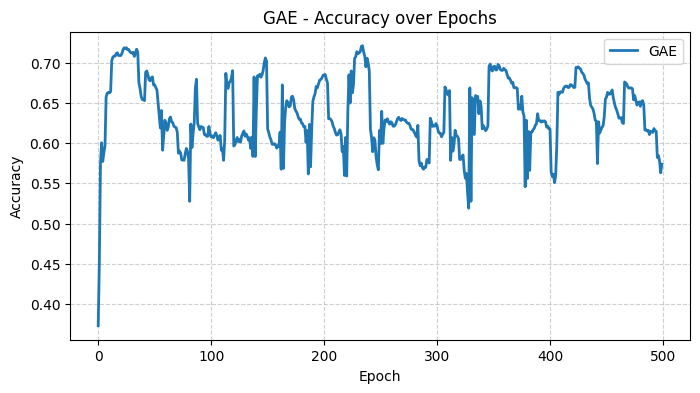

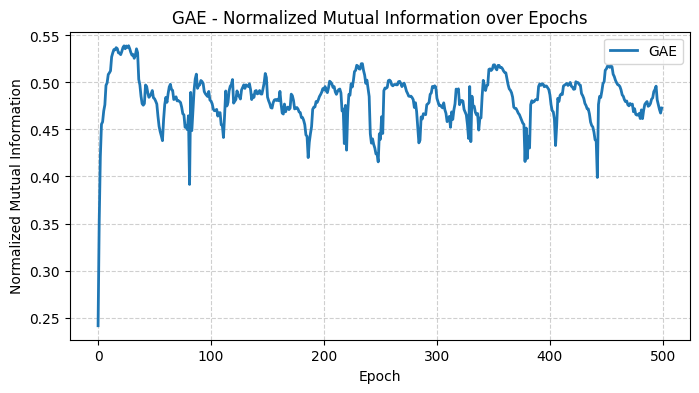

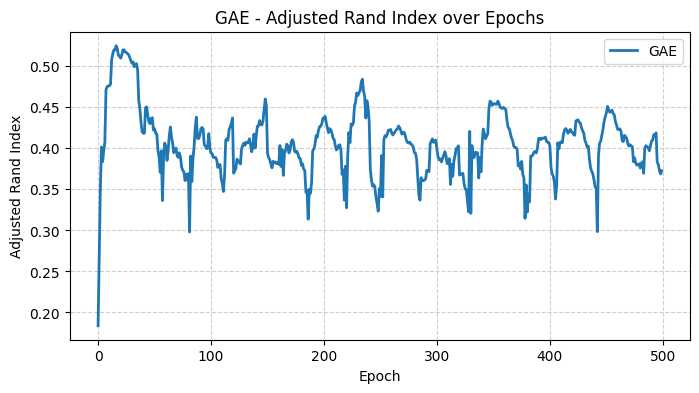

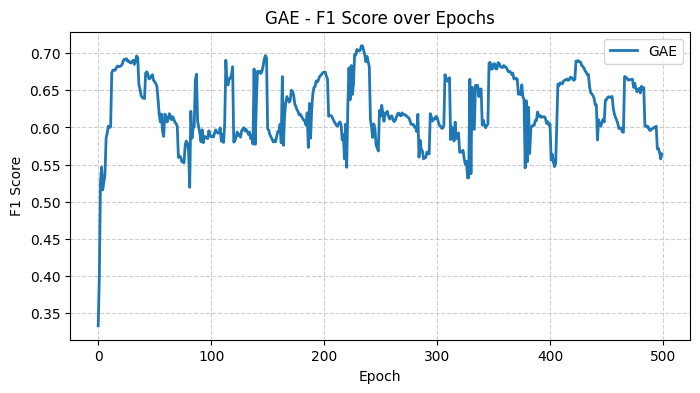

In [ ]:
metrics = ["acc", "nmi", "ari", "f1"]
titles = [
    "Accuracy",
    "Normalized Mutual Information",
    "Adjusted Rand Index",
    "F1 Score",
]

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(8, 4))
    plt.plot(GAE_data["epoch"], GAE_data[metric], label="GAE", color="C0", linewidth=2)
    plt.xlabel("Epoch")
    plt.ylabel(title)
    plt.title(f"GAE - {title} over Epochs")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.savefig(f"./GAE_{metric}.png", dpi=300, bbox_inches="tight")
    plt.show()

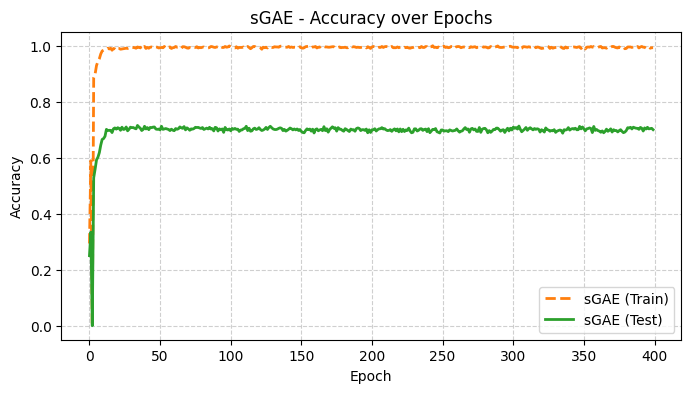

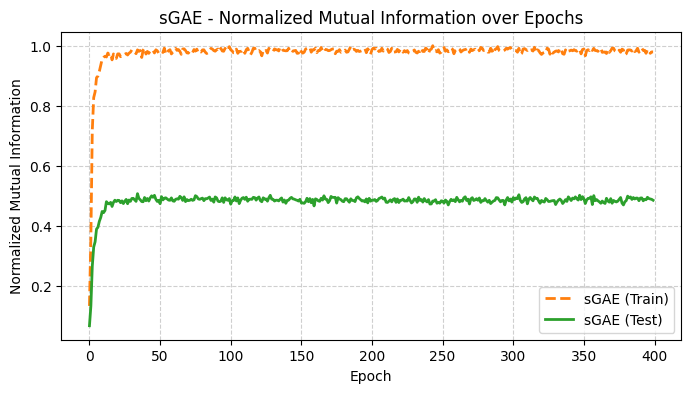

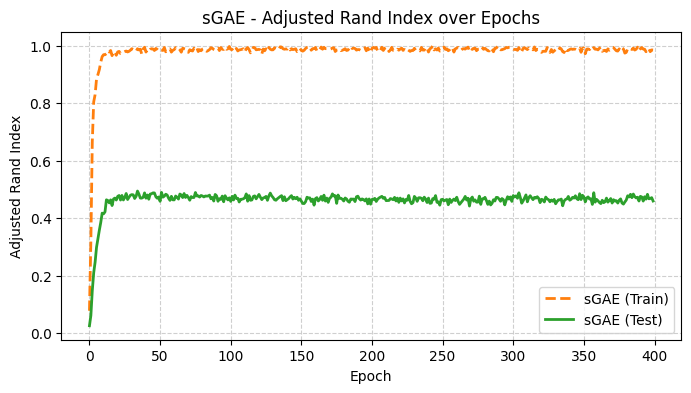

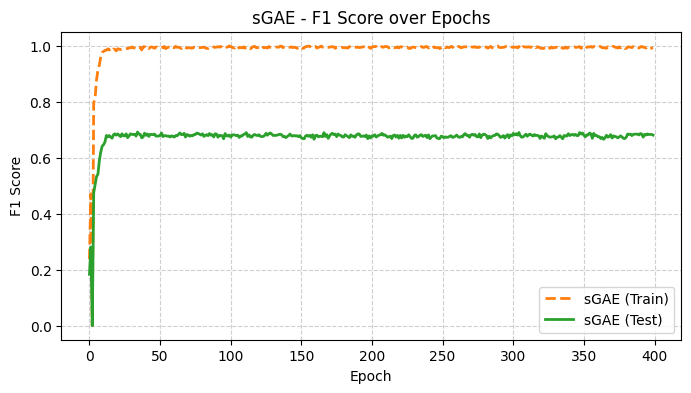

In [ ]:
metrics = ["acc", "nmi", "ari", "f1"]
titles = [
    "Accuracy",
    "Normalized Mutual Information",
    "Adjusted Rand Index",
    "F1 Score",
]

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(8, 4))
    plt.plot(sGAE_data["epoch"], sGAE_data[f"train_{metric}"], label="sGAE (Train)", linestyle="--", linewidth=2, color="C1")
    plt.plot(sGAE_data["epoch"], sGAE_data[f"test_{metric}"], label="sGAE (Test)", linestyle="-", linewidth=2, color="C2")
    plt.xlabel("Epoch")
    plt.ylabel(title)
    plt.title(f"sGAE - {title} over Epochs")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.savefig(f"./sGAE_{metric}.png", dpi=300, bbox_inches="tight")
    plt.show()

In [18]:
import numpy as np

output = np.load("./best_output.npy")

In [20]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(output)


In [26]:
output = np.exp(output)
output

array([[9.9999511e-01, 7.6862187e-07, 9.0435634e-07, ..., 7.7768954e-07,
        7.7235683e-07, 7.8908249e-07],
       [5.4109977e-03, 2.3390995e-02, 7.0617320e-03, ..., 3.9464433e-02,
        9.0825367e-01, 7.2656693e-03],
       [6.3012618e-01, 4.5504734e-02, 5.0013445e-02, ..., 3.2712035e-02,
        1.7485760e-01, 3.6469489e-02],
       ...,
       [1.4034699e-02, 1.1151519e-02, 9.6809138e-03, ..., 7.3638403e-01,
        9.6084075e-03, 9.3133405e-02],
       [9.9951810e-01, 6.3571133e-05, 1.4360911e-04, ..., 6.2907195e-05,
        7.7984048e-05, 6.4816370e-05],
       [9.9998528e-01, 2.1587537e-06, 3.6054576e-06, ..., 2.1251456e-06,
        2.2888303e-06, 2.2294219e-06]], dtype=float32)

In [29]:
import torch

output_best = torch.load("./best_output.pt", map_location = "cpu")
y_pred = torch.load("./y_pred.pt", map_location = "cpu")

In [30]:
output_best

tensor([[ -7.6270,  -7.2947,  -7.8466,  ...,  -6.9334,  -8.1218,  -7.4454],
        [ -4.9483,  -4.6714,  -4.7253,  ...,  -1.3593,  -2.4662,  -4.0459],
        [ -6.6392,  -6.7583,  -6.4399,  ...,  -4.2819,  -5.3658,  -6.0064],
        ...,
        [ -3.7405,  -5.8336,  -1.7010,  ...,  -5.7629,  -5.3551,  -0.3757],
        [-11.1529, -11.3846, -10.7637,  ..., -10.5262, -11.8330, -11.4460],
        [-11.7966, -11.5637, -11.9942,  ..., -11.2368, -12.5199, -12.0205]],
       requires_grad=True)

In [31]:
y_pred

tensor([3, 4, 5,  ..., 6, 3, 3])

In [34]:
y_output = np.argmax(output_best.cpu().detach().numpy(), axis = 1)
y_output

array([3, 3, 3, ..., 6, 3, 3])

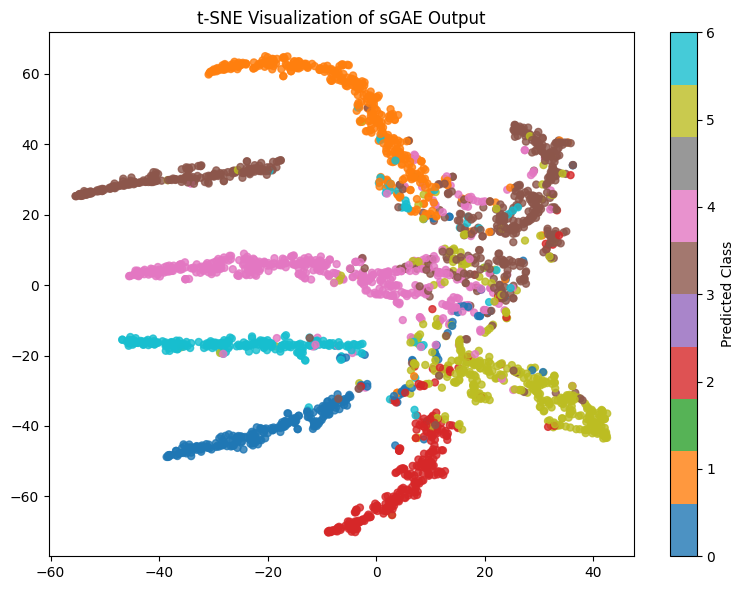

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=y_pred,  # or dataset.y for ground truth
    cmap="tab10",
    alpha=0.8,
    s=25
)
plt.title("t-SNE Visualization of sGAE Output")
plt.colorbar(scatter, label="Predicted Class")
plt.tight_layout()
plt.savefig("original_output.png")
plt.show()


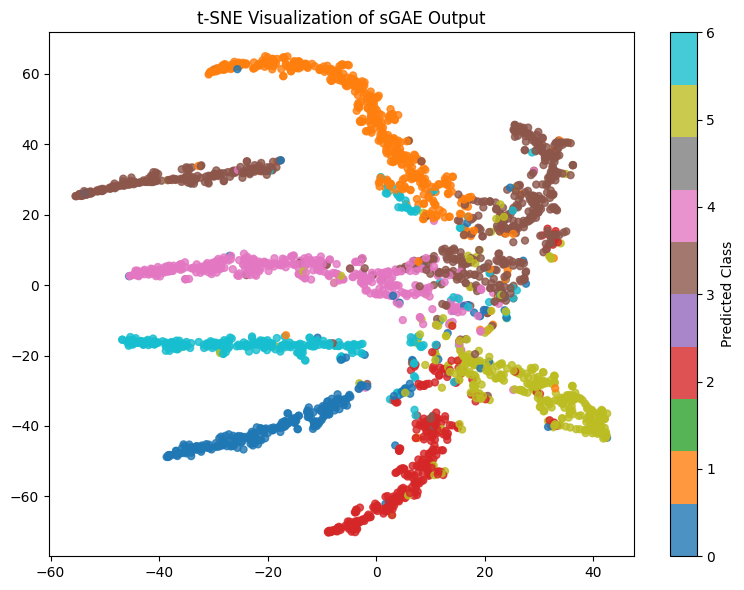

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=y_output,  # or dataset.y for ground truth
    cmap="tab10",
    alpha=0.8,
    s=25
)
plt.title("t-SNE Visualization of sGAE Output")
plt.colorbar(scatter, label="Predicted Class")
plt.tight_layout()
plt.savefig("output_of_the_model.png")
plt.show()
